In [1]:
import sys
from scipy.io import loadmat, savemat
from math import pi

import matplotlib.pyplot as plt
import torch
import torchaudio

%load_ext autoreload
%autoreload 2
%matplotlib inline

from dstft import DSTFT, FDSTFT

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1802);

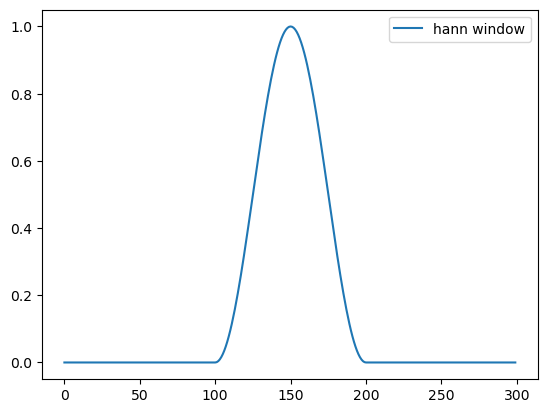

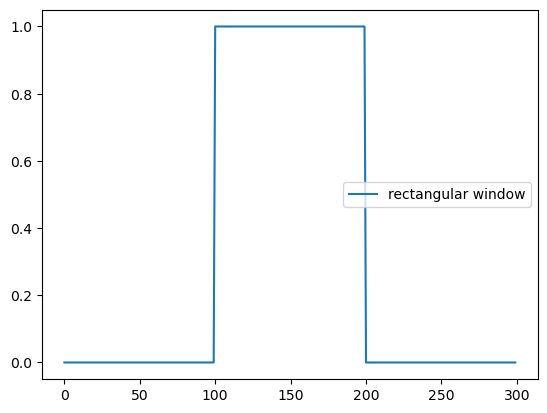

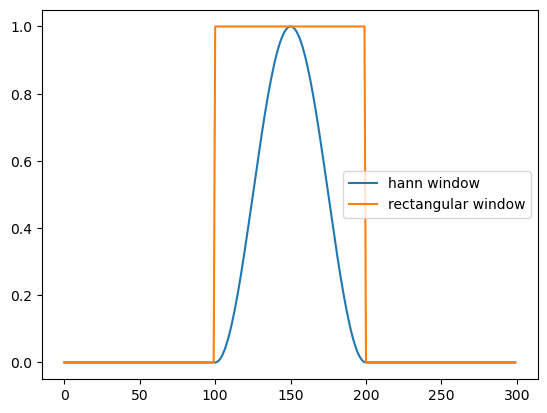

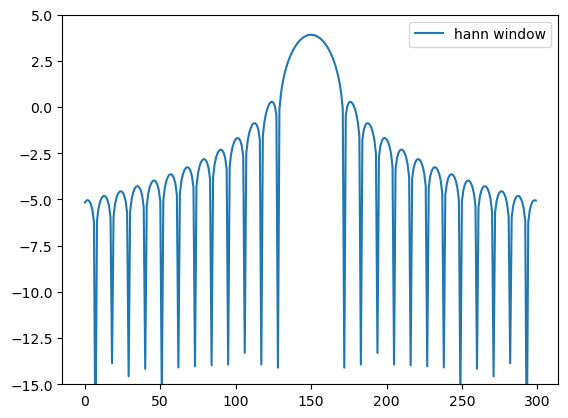

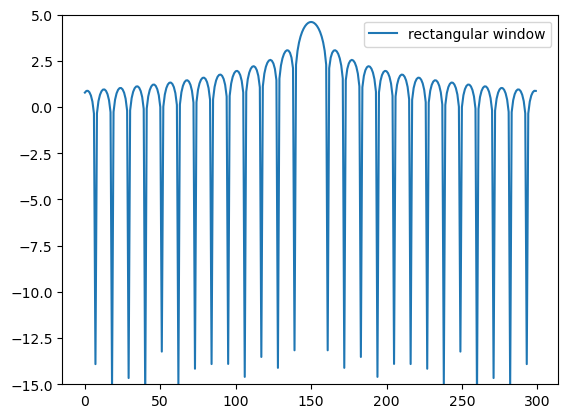

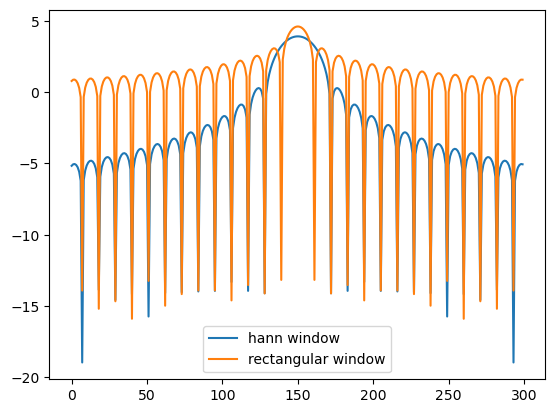

In [2]:
N = 100; P = 500
hann = torch.nn.functional.pad(torch.hann_window(N), (P, P), mode='constant', value=0)
rect = torch.zeros_like(hann)
rect[len(hann)//2 - N//2:len(hann)//2 + N//2] = 1
plt.plot(hann[400:700], label='hann window')
plt.legend()
plt.figure()
plt.plot(rect[400:700], label='rectangular window')
plt.legend()
plt.figure()
plt.plot(hann[400:700], label='hann window')
plt.plot(rect[400:700], label='rectangular window')
plt.legend()

plt.figure()
plt.plot(torch.fft.fftshift(torch.fft.fft(hann)).abs().log()[400:700], label='hann window')
plt.ylim(-15,5)
plt.legend()
plt.figure()
plt.plot(torch.fft.fftshift(torch.fft.fft(rect)).abs().log()[400:700], label='rectangular window')
plt.ylim(-15,5)
plt.legend()
plt.figure()
plt.plot(torch.fft.fftshift(torch.fft.fft(hann)).abs().log()[400:700], label='hann window')
plt.plot(torch.fft.fftshift(torch.fft.fft(rect)).abs().log()[400:700], label='rectangular window')
plt.legend();

torch.Size([1, 1000]) cuda:0 torch.float32


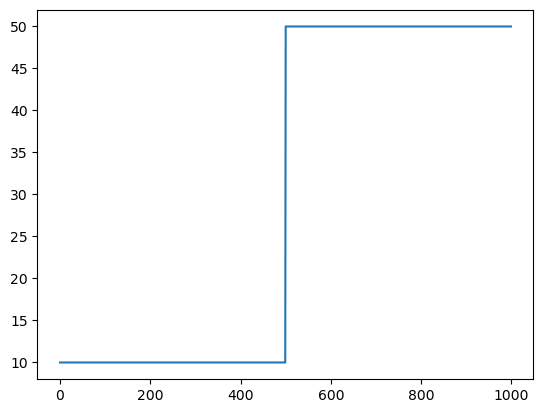

In [3]:
sr = 200
size = 500
f = torch.cat( (10*torch.ones(size), 50*torch.ones(size)) )
x = torch.sin(2*pi*torch.cumsum(f, 0)/sr) #+ 0.05*torch.randn_like(f)
x = x[None, :].to(device)
print(x.shape, x.device, x.dtype)
plt.figure()
plt.plot(f);

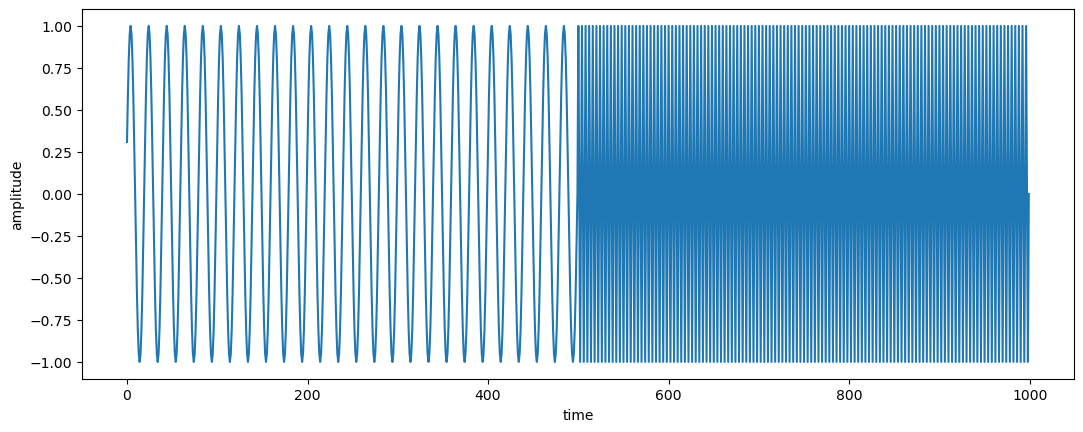

In [4]:
plt.figure(figsize=(2*6.4, 4.8))
plt.plot(x[0].cpu());
plt.ylabel('amplitude')
plt.xlabel('time');

torch.Size([1, 1000]) cuda:0 torch.float32


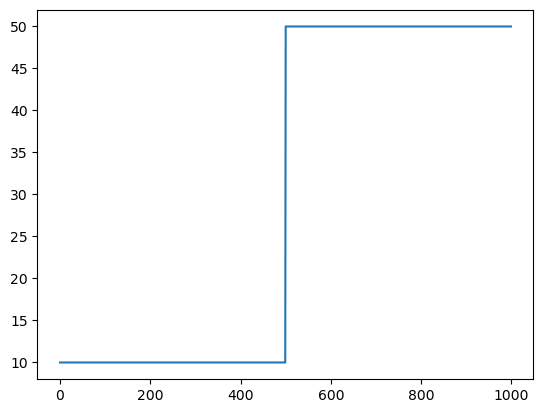

In [5]:
sr = 200
size = 500
f = torch.cat( (10*torch.ones(size), 50*torch.ones(size)) )
x = torch.sin(2*pi*torch.cumsum(f, 0)/sr) #+ 0.05*torch.randn_like(f)
x = x[None, :].to(device)
print(x.shape, x.device, x.dtype)
plt.figure()
plt.plot(f)

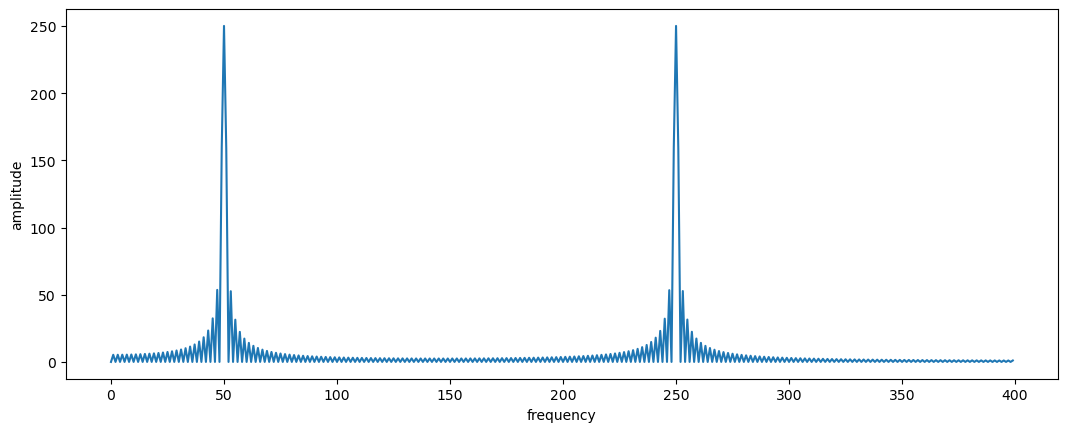

In [6]:
plt.figure(figsize=(2*6.4, 4.8))
plt.plot(torch.fft.rfft(x[0]).abs().cpu()[:400])
plt.ylabel('amplitude')
plt.xlabel('frequency');

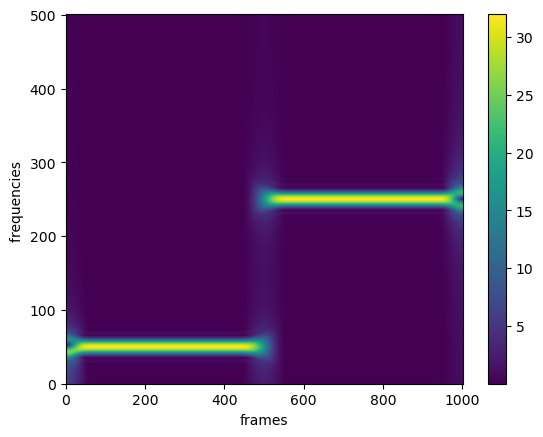

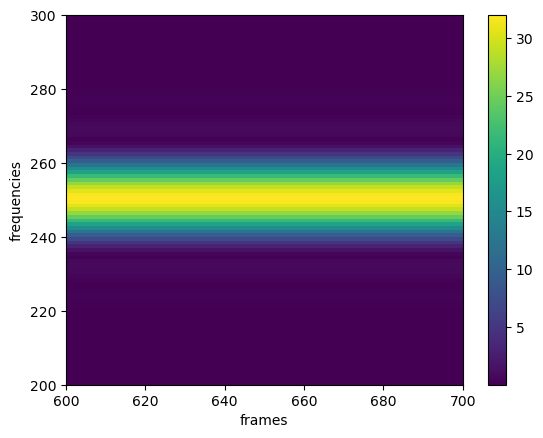

In [7]:
spec = torchaudio.transforms.Spectrogram(n_fft=1000, win_length=128, hop_length=1)(x.cpu())
ax = plt.subplot()
im = ax.imshow(spec[0].pow(.5).cpu(), aspect='auto', origin='lower', cmap='viridis', extent=[0,spec.shape[-1], 0, spec.shape[-2]])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames')

plt.figure()
ax = plt.subplot()
im = ax.imshow(spec[0, 200:300, 600:700].cpu().pow(.5), aspect='auto', origin='lower', cmap='viridis', extent=[600, 700, 200,300])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies')
plt.xlabel('frames');

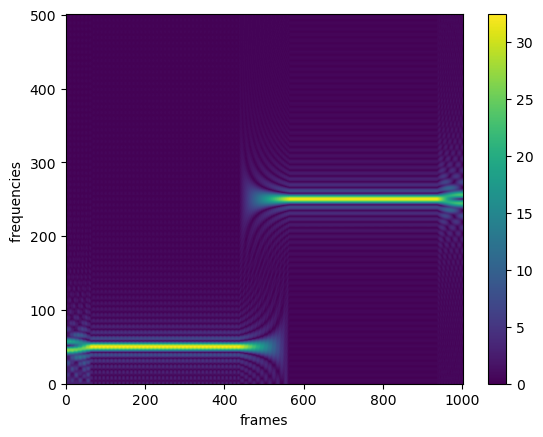

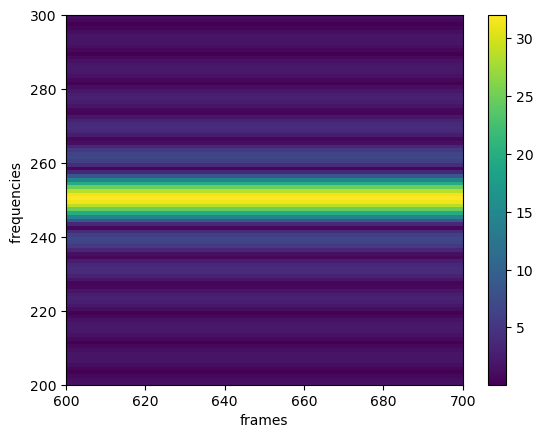

In [8]:
window_fn = lambda t : torch.ones(t)/2
spec = torchaudio.transforms.Spectrogram(n_fft=1000, win_length=128, hop_length=1, window_fn=window_fn)(x.cpu())
ax = plt.subplot()
im = ax.imshow(spec[0].cpu().pow(.5), aspect='auto', origin='lower', cmap='viridis', extent=[0,spec.shape[-1], 0, spec.shape[-2]])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames')

plt.figure()
ax = plt.subplot()
im = ax.imshow(spec[0, 200:300, 600:700].cpu().pow(.5), aspect='auto', origin='lower', cmap='viridis', extent=[600, 700, 200,300])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames');

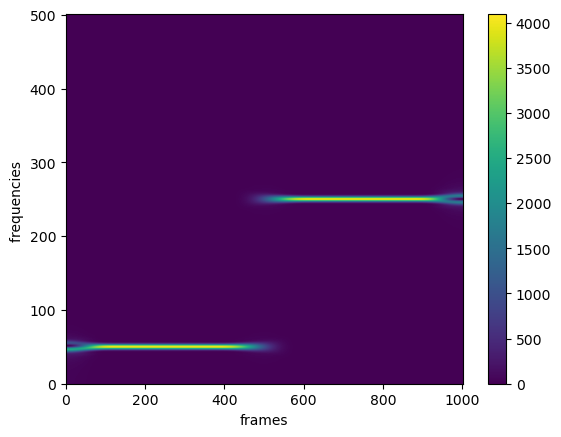

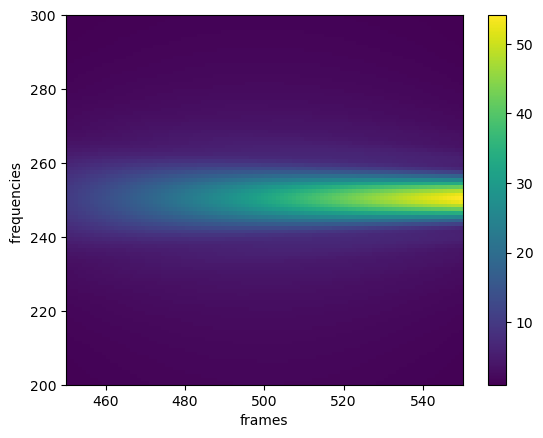

In [9]:
spec = torchaudio.transforms.Spectrogram(n_fft=1000, win_length=256, hop_length=1)(x.cpu())
ax = plt.subplot()
im = ax.imshow(spec[0].cpu(), aspect='auto', origin='lower', cmap='viridis', extent=[0,spec.shape[-1], 0, spec.shape[-2]])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames')

plt.figure()
ax = plt.subplot()
im = ax.imshow(spec[0, 200:300, 450:550].cpu().pow(.5), aspect='auto', origin='lower', cmap='viridis', extent=[450, 550, 200,300])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames');

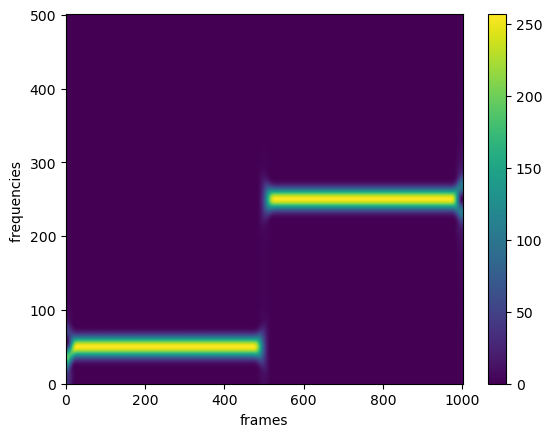

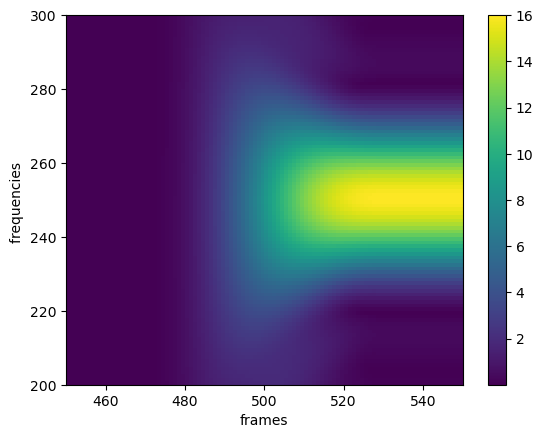

In [10]:
spec = torchaudio.transforms.Spectrogram(n_fft=1000, win_length=64, hop_length=1)(x.cpu())
ax = plt.subplot()
im = ax.imshow(spec[0].cpu(), aspect='auto', origin='lower', cmap='viridis', extent=[0,spec.shape[-1], 0, spec.shape[-2]])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames');

plt.figure()
ax = plt.subplot()
im = ax.imshow(spec[0, 200:300, 450:550].cpu().pow(.5), aspect='auto', origin='lower', cmap='viridis', extent=[450, 550, 200,300])
plt.colorbar(im, ax=ax)
plt.ylabel('frequencies ')
plt.xlabel('frames');